In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import fitz
from pathlib import Path
from itertools import islice
from categorizer import PDFTextBlockCategorizer
import re


class PDFExtractor:
    pdf_root = "..."

    def __init__(self):
        pdf_filename = "P:\GP\A Christmas Carol.pdf"
        self.pdf_fullpath = "P:\GP\A Christmas Carol.pdf"
        self.pdf_doc = fitz.open(self.pdf_fullpath)

    def calc_rect_center(self, rect, reverse_y=False):
        if reverse_y:
            x0, y0, x1, y1 = rect[0], -rect[1], rect[2], -rect[3]
        else:
            x0, y0, x1, y1 = rect

        x_center = (x0 + x1) / 2
        y_center = (y0 + y1) / 2
        return (x_center, y_center)

    def extract_all_text_blocks(self):
        # * https://pymupdf.readthedocs.io/en/latest/textpage.html#TextPage.extractBLOCKS

        rect_centers = []
        rects = []
        visual_label_texts = [] 
        categorize_vectors = []

        selected_blocks = []

        for page_idx, page in islice(enumerate(self.pdf_doc), len(self.pdf_doc)):
            blocks = page.get_text("blocks")
            page_cnt = page_idx + 1
            max_text_length = 0
            max_text_block = None
            #print(f"=== Start Page {page_cnt}: {len(blocks)} blocks ===")
            block_cnt = 0
            for block in blocks:
                block_rect = block[:4]  # (x0,y0,x1,y1)
                #print(f"***************\n\n{block_rect}\n\n************************\n\n")
                x0, y0, x1, y1 = block_rect
                rects.append(block_rect)
                block_text = block[4]
                #print(f"***************\n\n{block_text}\n\n************************\n\n")
                # if len(block_text) > max_text_length:
                #     max_text_length = len(block_text)
                #     max_text_block = block

                    
                block_num = block[5]
                # block_cnt += 1
                block_cnt = block_num + 1

                rect_center = self.calc_rect_center(block_rect, reverse_y=True)
                rect_centers.append(rect_center)
                # visual_label_text = f"{block_text.split()[-1]}({page_cnt}.{block_cnt})"
                visual_label_text = f"({page_cnt}.{block_cnt})"
                visual_label_texts.append(visual_label_text)

                block_type = "text" if block[6] == 0 else "image"
                # print(f"Block: {page_cnt}.{block_cnt}")
                # print(f"<{block_type}> {rect_center} - {block_rect}")
                #print(block_text)
                #categorize_vectors.append((*block_rect, block_text))
            blocks_sorted_by_y = sorted(blocks, key=lambda block: (block[1] + block[3]) / 2)

            if len(blocks_sorted_by_y) >= 3:
                central_block = blocks_sorted_by_y[len(blocks_sorted_by_y) // 2]
                block_rect = central_block[:4]
                block_text = central_block[4]
                selected_blocks.append((block_text))

            # if max_text_block:
            #     block_rect = max_text_block[:4]
            #     block_text = max_text_block[4]
            #     selected_blocks.append(block_text)
            #print(f"=== End Page {page_cnt}: {len(blocks)} blocks ===\n")

        for i in selected_blocks:
            print(i)
        categorizer = PDFTextBlockCategorizer(selected_blocks)
        categorizer.run()

        fig, ax = plt.subplots()
        colors = ["b", "r", "g", "c", "m", "y", "k"]

        for i, rect_center in enumerate(rect_centers):
            label_idx = categorizer.labels[i]
            #print(f"***************\n\n{label_idx}\n\n************************\n\n")
            color = colors[label_idx]
            x0, y0, x1, y1 = rects[i]
            rect = Rectangle((x0, -y0), x1 - x0, -y1 + y0, fill=False, edgecolor=color)
            ax.add_patch(rect)
            x, y = rect_center
            plt.scatter(x, y, color=color)
            plt.annotate(visual_label_texts[i], rect_center)
        plt.show()

    def run(self):
        self.extract_all_text_blocks()


if __name__ == "__main__":
    pdf_extractor = PDFExtractor()
    pdf_extractor.run()

=== Start Page 1: 11 blocks ===
=== End Page 1: 8 blocks ===

=== Start Page 2: 4 blocks ===
=== End Page 2: 2 blocks ===

=== Start Page 3: 6 blocks ===
=== End Page 3: 5 blocks ===

=== Start Page 4: 9 blocks ===
=== End Page 4: 7 blocks ===

=== Start Page 5: 15 blocks ===
=== End Page 5: 11 blocks ===

=== Start Page 6: 0 blocks ===
=== End Page 6: 0 blocks ===

=== Start Page 7: 7 blocks ===
=== End Page 7: 5 blocks ===

=== Start Page 8: 3 blocks ===
=== End Page 8: 3 blocks ===

=== Start Page 9: 3 blocks ===
=== End Page 9: 3 blocks ===

=== Start Page 10: 3 blocks ===
=== End Page 10: 3 blocks ===

=== Start Page 11: 3 blocks ===
=== End Page 11: 3 blocks ===

=== Start Page 12: 3 blocks ===
=== End Page 12: 3 blocks ===

=== Start Page 13: 3 blocks ===
=== End Page 13: 3 blocks ===

=== Start Page 14: 5 blocks ===
=== End Page 14: 5 blocks ===

=== Start Page 15: 3 blocks ===
=== End Page 15: 3 blocks ===

=== Start Page 16: 3 blocks ===
=== End Page 16: 3 blocks ===

=== Sta

IndexError: list index out of range

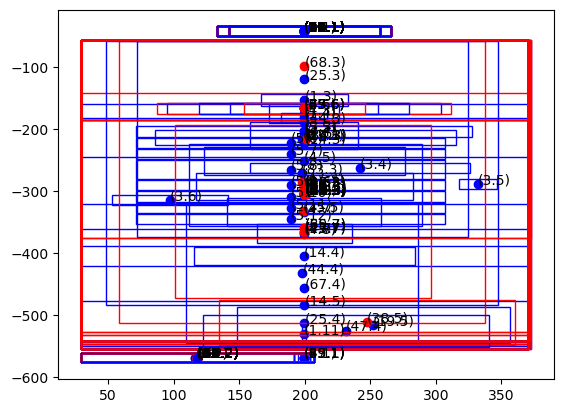

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import fitz
from pathlib import Path
from itertools import islice
from categorizer import PDFTextBlockCategorizer
import chardet
import re


class PDFExtractor:
    # pdf_root = "..."

    def __init__(self):
        # pdf_filename = "***.pdf"
        
        self.pdf_fullpath = "PDFs\A Christmas Carol.pdf"
        self.pdf_doc = fitz.open(self.pdf_fullpath)

    def calc_rect_center(self, rect, reverse_y=False):
        if reverse_y:
            x0, y0, x1, y1 = rect[0], -rect[1], rect[2], -rect[3]
        else:
            x0, y0, x1, y1 = rect

        x_center = (x0 + x1) / 2
        y_center = (y0 + y1) / 2
        return (x_center, y_center)

    def extract_all_text_blocks(self):
        # * https://pymupdf.readthedocs.io/en/latest/textpage.html#TextPage.extractBLOCKS

        rect_centers = []
        rects = []
        visual_label_texts = []
        categorize_vectors = []

        selected_blocks = []

        for page_idx, page in islice(enumerate(self.pdf_doc), len(self.pdf_doc)):
            blocks = page.get_text("blocks")


            page_cnt = page_idx + 1

            max_text_length = 0
            max_text_block = None


            print(f"=== Start Page {page_cnt}: {len(blocks)} blocks ===")
            
            block_cnt = 0
            for block in blocks:
                if not block[4].strip():
                    blocks.remove(block)
                    continue
                
                #print(block)
                block_rect = block[:4]  # (x0,y0,x1,y1)
                x0, y0, x1, y1 = block_rect
                rects.append(block_rect)

                block_text = block[4]

                # if len(block_text) > max_text_length:
                #     max_text_length = len(block_text)
                #     max_text_block = block
                    


                

                


                block_num = block[5]
                # block_cnt += 1
                block_cnt = block_num + 1

                rect_center = self.calc_rect_center(block_rect, reverse_y=True)
                rect_centers.append(rect_center)
                # visual_label_text = f"{block_text.split()[-1]}({page_cnt}.{block_cnt})"
                visual_label_text = f"({page_cnt}.{block_cnt})"
                visual_label_texts.append(visual_label_text)

                #block_type = "text" if block[6] == 0 else "image"

                if block[6] == 0:
                    block_type = "text"
                else:
                    block_type = "image"
                    continue

                # print(f"Block: {page_cnt}.{block_cnt}")
                # print(f"<{block_type}> {rect_center} - {block_rect}")
                # print(block_text)
                categorize_vectors.append((*block_rect, block_text))

            #blocks_sorted_by_y = sorted(blocks, key=lambda block: block[5])
            # for i in blocks_sorted_by_y: 
            #     print("\n\nSORTED\n\n")
            #     print(i)

            # if len(blocks_sorted_by_y) > 3:
            #     if len(blocks_sorted_by_y) == 7:
            #         for i in blocks_sorted_by_y:
            #             print(i)



            #     f = len(blocks_sorted_by_y) // 2
            #     central_block = blocks_sorted_by_y[f]
            #     print(f"\nSelected block = {f}\n")
            #     block_rect = central_block[:4]
            #     block_text = central_block[4]
            #     selected_blocks.append((block_text))
        
            print(f"=== End Page {page_cnt}: {len(blocks)} blocks ===\n")

            # if max_text_block:
            #     block_rect = max_text_block[:4]
            #     block_text = max_text_block[4]
            #     selected_blocks.append((block_text))


        
        categorizer = PDFTextBlockCategorizer(categorize_vectors)
        categorizer.run()
        
        for i in range(len(categorize_vectors)):

            try:
                integer_value = int(categorize_vectors[i][4])
                continue
            except ValueError:
                if categorizer.labels[i] == 0: 
                    selected_blocks.append(categorize_vectors[i])
                    #print(categorize_vectors[i][4])
                else:
                    continue
                
        def preprocess_text(text):
            cleaned_text = re.sub(r'�', ' ', text)
            return cleaned_text

        with open("file_name.txt", 'w') as file:

            for i in selected_blocks:
            #print("\n*******************************\n*************************************\n")
                x = preprocess_text(i[4])
                print(x)
            # Iterate through the list and write each string to the file
                file.write(x + '\n')
            
            # text = i[4].encode('utf-8')  # Replace with your extracted text

            # encoding_info = chardet.detect(text)
            # encoding = encoding_info['encoding']
            # confidence = encoding_info['confidence']

            # print(f"Detected encoding: {encoding} with confidence {confidence}")
        
        

        fig, ax = plt.subplots()
        colors = ["b", "r", "g", "c", "m", "y", "k"]

        for i, rect_center in enumerate(rect_centers):
            label_idx = categorizer.labels[i]
            #print(f"\n\nLabel index: {label_idx}\n\n")
            color = colors[label_idx]
            x0, y0, x1, y1 = rects[i]
            rect = Rectangle((x0, -y0), x1 - x0, -y1 + y0, fill=False, edgecolor=color)
            ax.add_patch(rect)
            x, y = rect_center
            plt.scatter(x, y, color=color)
            plt.annotate(visual_label_texts[i], rect_center)
        plt.show()

    def run(self):
        self.extract_all_text_blocks()


if __name__ == "__main__":
    pdf_extractor = PDFExtractor()
    pdf_extractor.run()